In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

In [2]:
x_val=np.load("x_validation.npy")
x_train=np.load("x_train.npy")
x_test=np.load("x_test.npy")
y_val=np.load("y_validation.npy")
y_train=np.load("y_train.npy")
y_test=np.load("y_test.npy")

In [3]:
print(f"X_train boyutu{x_train.shape}")
print(f"Y_train boyutu{y_train.shape}")
input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])
print(f"input shape {input_shape}")

X_train boyutu(6985, 64, 64, 1)
Y_train boyutu(6985, 10)
input shape (64, 64, 1)


In [4]:
# Kontrol amaçlı.
print(f"Length of Xtrain: {len(x_train)}")
print(f"Length of Xtest: {len(x_test)}")
print(f"Length of Xvalidation: {len(x_val)}")
print(f"Length of Ytrain: {len(y_train)}")
print(f"Length of Ytest: {len(y_test)}")
print(f"Length of Yvalidation: {len(y_val)}")

Length of Xtrain: 6985
Length of Xtest: 874
Length of Xvalidation: 873
Length of Ytrain: 6985
Length of Ytest: 874
Length of Yvalidation: 873


In [5]:
def Create_Model():
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32,
                                        kernel_size=(3,3),
                                        strides=(1,1),
                                        activation="relu",
                                        input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))                                   
    model.add(tf.keras.layers.Conv2D(64,
                                        kernel_size=(3,3),
                                        strides=(1,1),
                                        activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))                                   
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Conv2D(128,
                                    kernel_size=(3,3),
                                    strides=(1,1),
                                    padding="same",
                                    activation="relu"))    
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))                                   
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Conv2D(128,
                                    kernel_size=(3,3),
                                    strides=(1,1),
                                    padding="same",
                                    activation="relu"))    
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))                                   
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512,activation="relu"))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(218,activation="relu"))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

2022-10-05 18:29:02.919045: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-05 18:29:02.919399: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



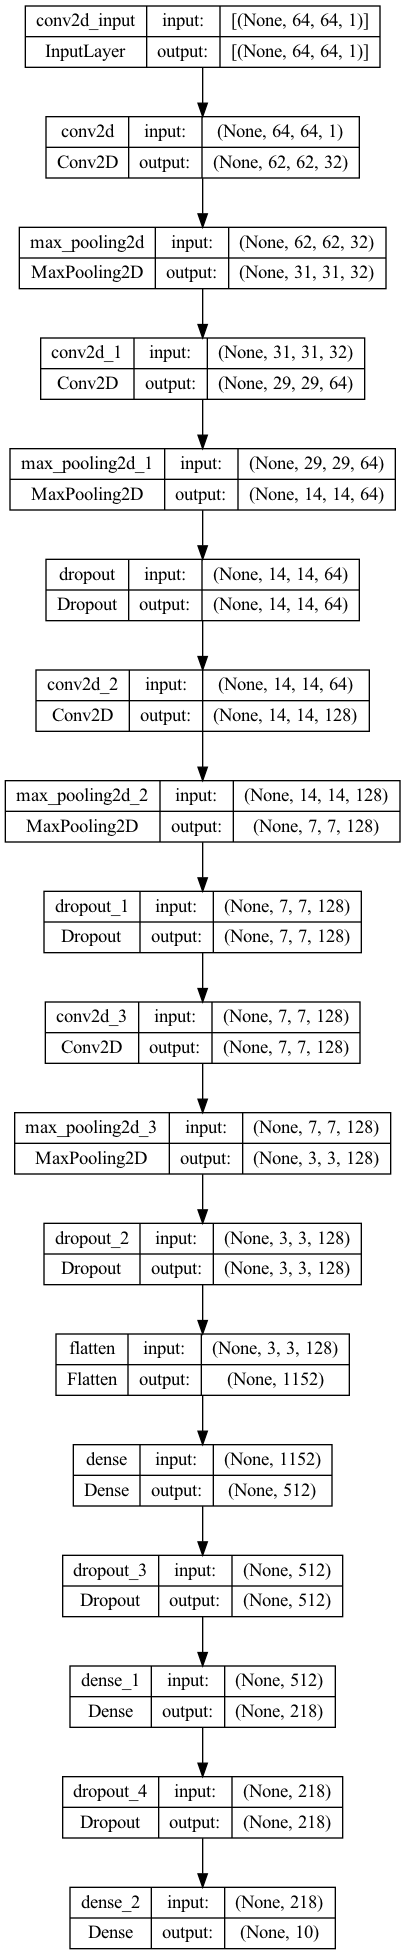

In [6]:
plot_model(Create_Model(), to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
model=Create_Model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)      

In [8]:
#result1
batch_size = 256
epochs = 50
result=model.fit(x_train,y_train,batch_size,epochs,validation_data=(x_val,y_val))

Epoch 1/50


2022-10-05 18:29:13.279277: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-05 18:29:13.540959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - ETA: 0s - loss: 2.2635 - accuracy: 0.1311

2022-10-05 18:29:15.975480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 3s 82ms/step - loss: 2.2635 - accuracy: 0.1311 - val_loss: 2.2498 - val_accuracy: 0.2131
Epoch 2/50
28/28 [==============================] - 2s 67ms/step - loss: 2.0721 - accuracy: 0.2157 - val_loss: 2.0171 - val_accuracy: 0.2497
Epoch 3/50
28/28 [==============================] - 2s 68ms/step - loss: 1.9677 - accuracy: 0.2440 - val_loss: 1.9359 - val_accuracy: 0.2658
Epoch 4/50
28/28 [==============================] - 2s 62ms/step - loss: 1.9089 - accuracy: 0.2550 - val_loss: 1.8642 - val_accuracy: 0.3139
Epoch 5/50
28/28 [==============================] - 2s 64ms/step - loss: 1.8242 - accuracy: 0.2988 - val_loss: 1.7853 - val_accuracy: 0.3551
Epoch 6/50
28/28 [==============================] - 2s 63ms/step - loss: 1.7106 - accuracy: 0.3436 - val_loss: 1.7301 - val_accuracy: 0.3654
Epoch 7/50
28/28 [==============================] - 2s 63ms/step - loss: 1.6501 - accuracy: 0.3707 - val_loss: 1.6114 - val_accuracy: 0.4044
Epoch 8/50
28/28 [======

In [9]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.8962061405181885
Testing Accuracy:  0.8512586355209351


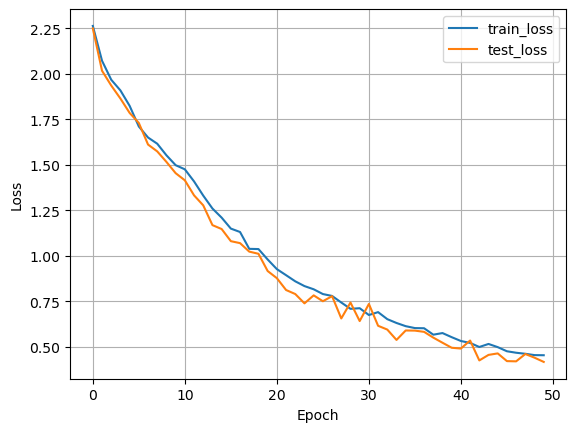

In [10]:
metrics = result.history
plt.plot(result.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['train_loss', 'test_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

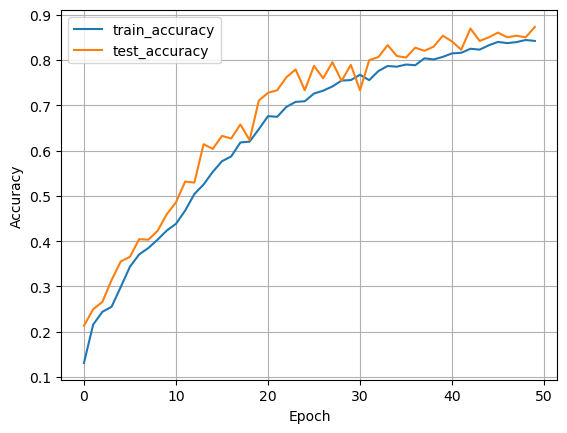

In [11]:
plt.plot(result.history['accuracy'], label='train_accuracy')
plt.plot(result.history['val_accuracy'], label='test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
#result2
batch_size = 256
epochs = 100
result2=model.fit(x_train,y_train,batch_size,epochs,validation_data=(x_val,y_val))

Epoch 1/100
28/28 [==============================] - 2s 73ms/step - loss: 0.4503 - accuracy: 0.8445 - val_loss: 0.4241 - val_accuracy: 0.8568
Epoch 2/100
28/28 [==============================] - 2s 62ms/step - loss: 0.4517 - accuracy: 0.8421 - val_loss: 0.4015 - val_accuracy: 0.8591
Epoch 3/100
28/28 [==============================] - 2s 62ms/step - loss: 0.4267 - accuracy: 0.8508 - val_loss: 0.3968 - val_accuracy: 0.8683
Epoch 4/100
28/28 [==============================] - 2s 66ms/step - loss: 0.4214 - accuracy: 0.8555 - val_loss: 0.4495 - val_accuracy: 0.8603
Epoch 5/100
28/28 [==============================] - 2s 61ms/step - loss: 0.4371 - accuracy: 0.8515 - val_loss: 0.4517 - val_accuracy: 0.8408
Epoch 6/100
28/28 [==============================] - 2s 61ms/step - loss: 0.4362 - accuracy: 0.8487 - val_loss: 0.3921 - val_accuracy: 0.8763
Epoch 7/100
28/28 [==============================] - 2s 65ms/step - loss: 0.4150 - accuracy: 0.8581 - val_loss: 0.3868 - val_accuracy: 0.8671
Epoch 

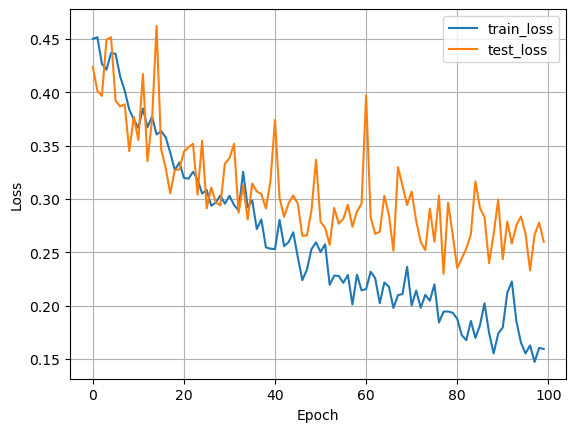

In [14]:
metrics = result2.history
plt.plot(result2.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['train_loss', 'test_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

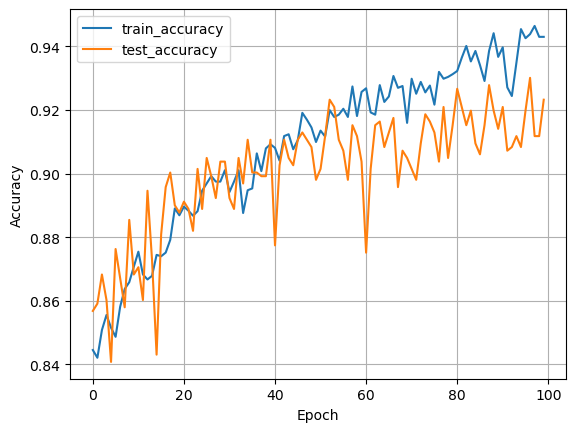

In [15]:
plt.plot(result2.history['accuracy'], label='train_accuracy')
plt.plot(result2.history['val_accuracy'], label='test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9822477102279663
Testing Accuracy:  0.9244852066040039
